In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_excel(r'/content/Apple Quality.xlsx')

In [ ]:
data.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity Quality  
0 -0.491590    good  
1 -0.722809    good  
2  2.621636     bad  
3  0.790723    good  
4  0.501984    good

In [ ]:
data.tail()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
3995  3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity Quality  
3995  0.137784     bad  
3996  1.854235    good  
3997 -1.334611     bad  
3998 -2.229720    good  
3999  1.599796    good

In [ ]:
data.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity  
count  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877  
std       1.930286     1.874427     2.110270  
min      -5.961897    -5.864599    -7.010538  
25%      -0.801286    -0.771677    -1.377424  
50%       0.534219     0.503445     0.022609  
75%       1.835976     1.766212     1.510493  
max       7.364403     7.237837     7.404736

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [ ]:
# Checking the data shape
shape_of_data = data.shape
print(shape_of_data)

(4000, 9)


In [ ]:
# Null values checking
data.isna()
data.isna().sum()
data.isna().sum()/len(data)*100
data.isna().sum()/len(data)*1000

A_id           0.0
Size           0.0
Weight         0.0
Sweetness      0.0
Crunchiness    0.0
Juiciness      0.0
Ripeness       0.0
Acidity        0.0
Quality        0.0
dtype: float64

In [ ]:
# Duplicat values check
Checking_duplicate_values=data.duplicated().sum()
print(f'The data set contains the {Checking_duplicate_values} duplicate values')

The data set contains the 0 duplicate values


In [ ]:
# Checking the some stastical information in the data
data.describe().style.background_gradient(cmap='RdYlBu')

In [ ]:
# Selecting only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

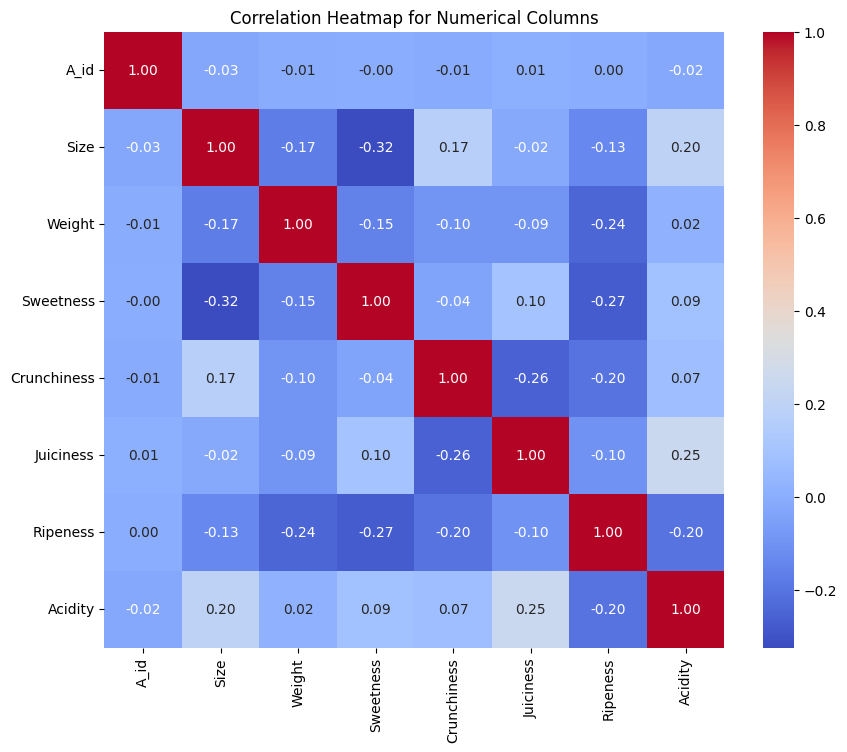

In [ ]:
# Heatmap for Correlation with all numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

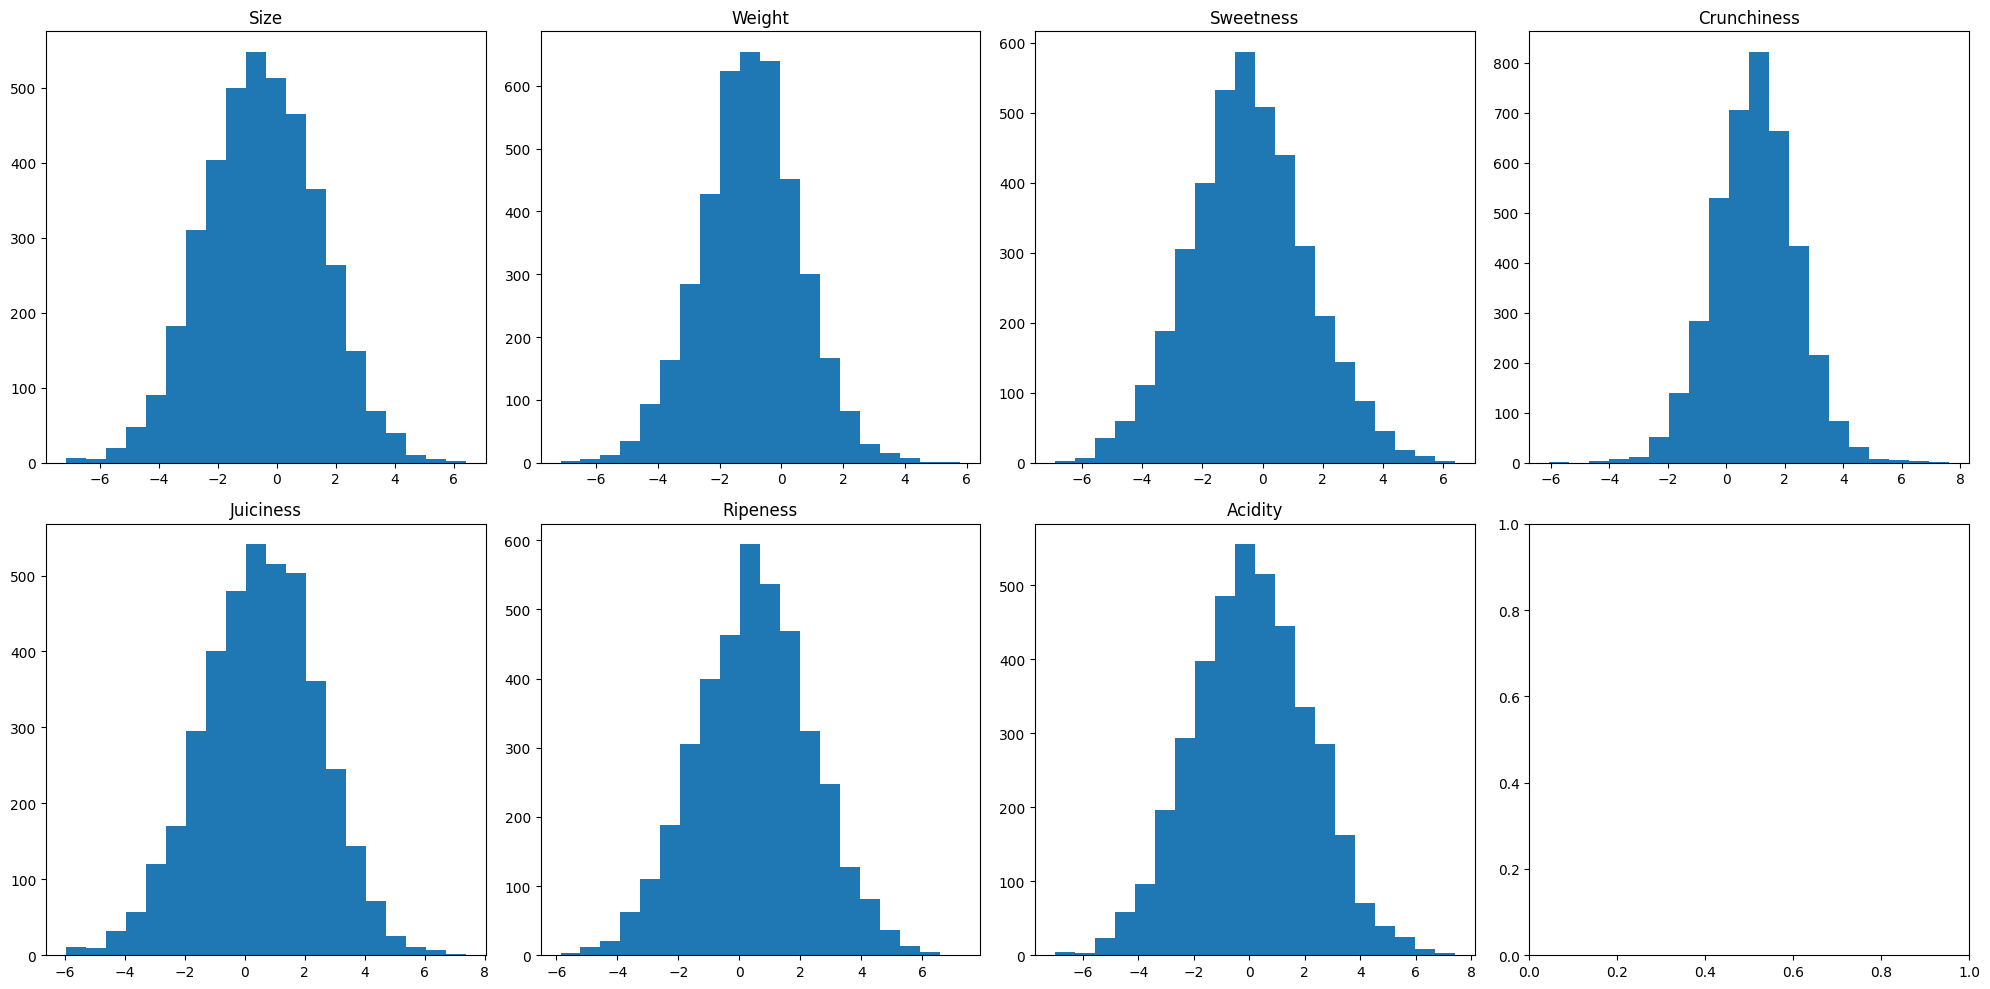

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(numerical_data.columns[1:]):
    axs[i//4, i%4].hist(numerical_data[col], bins=20)
    axs[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

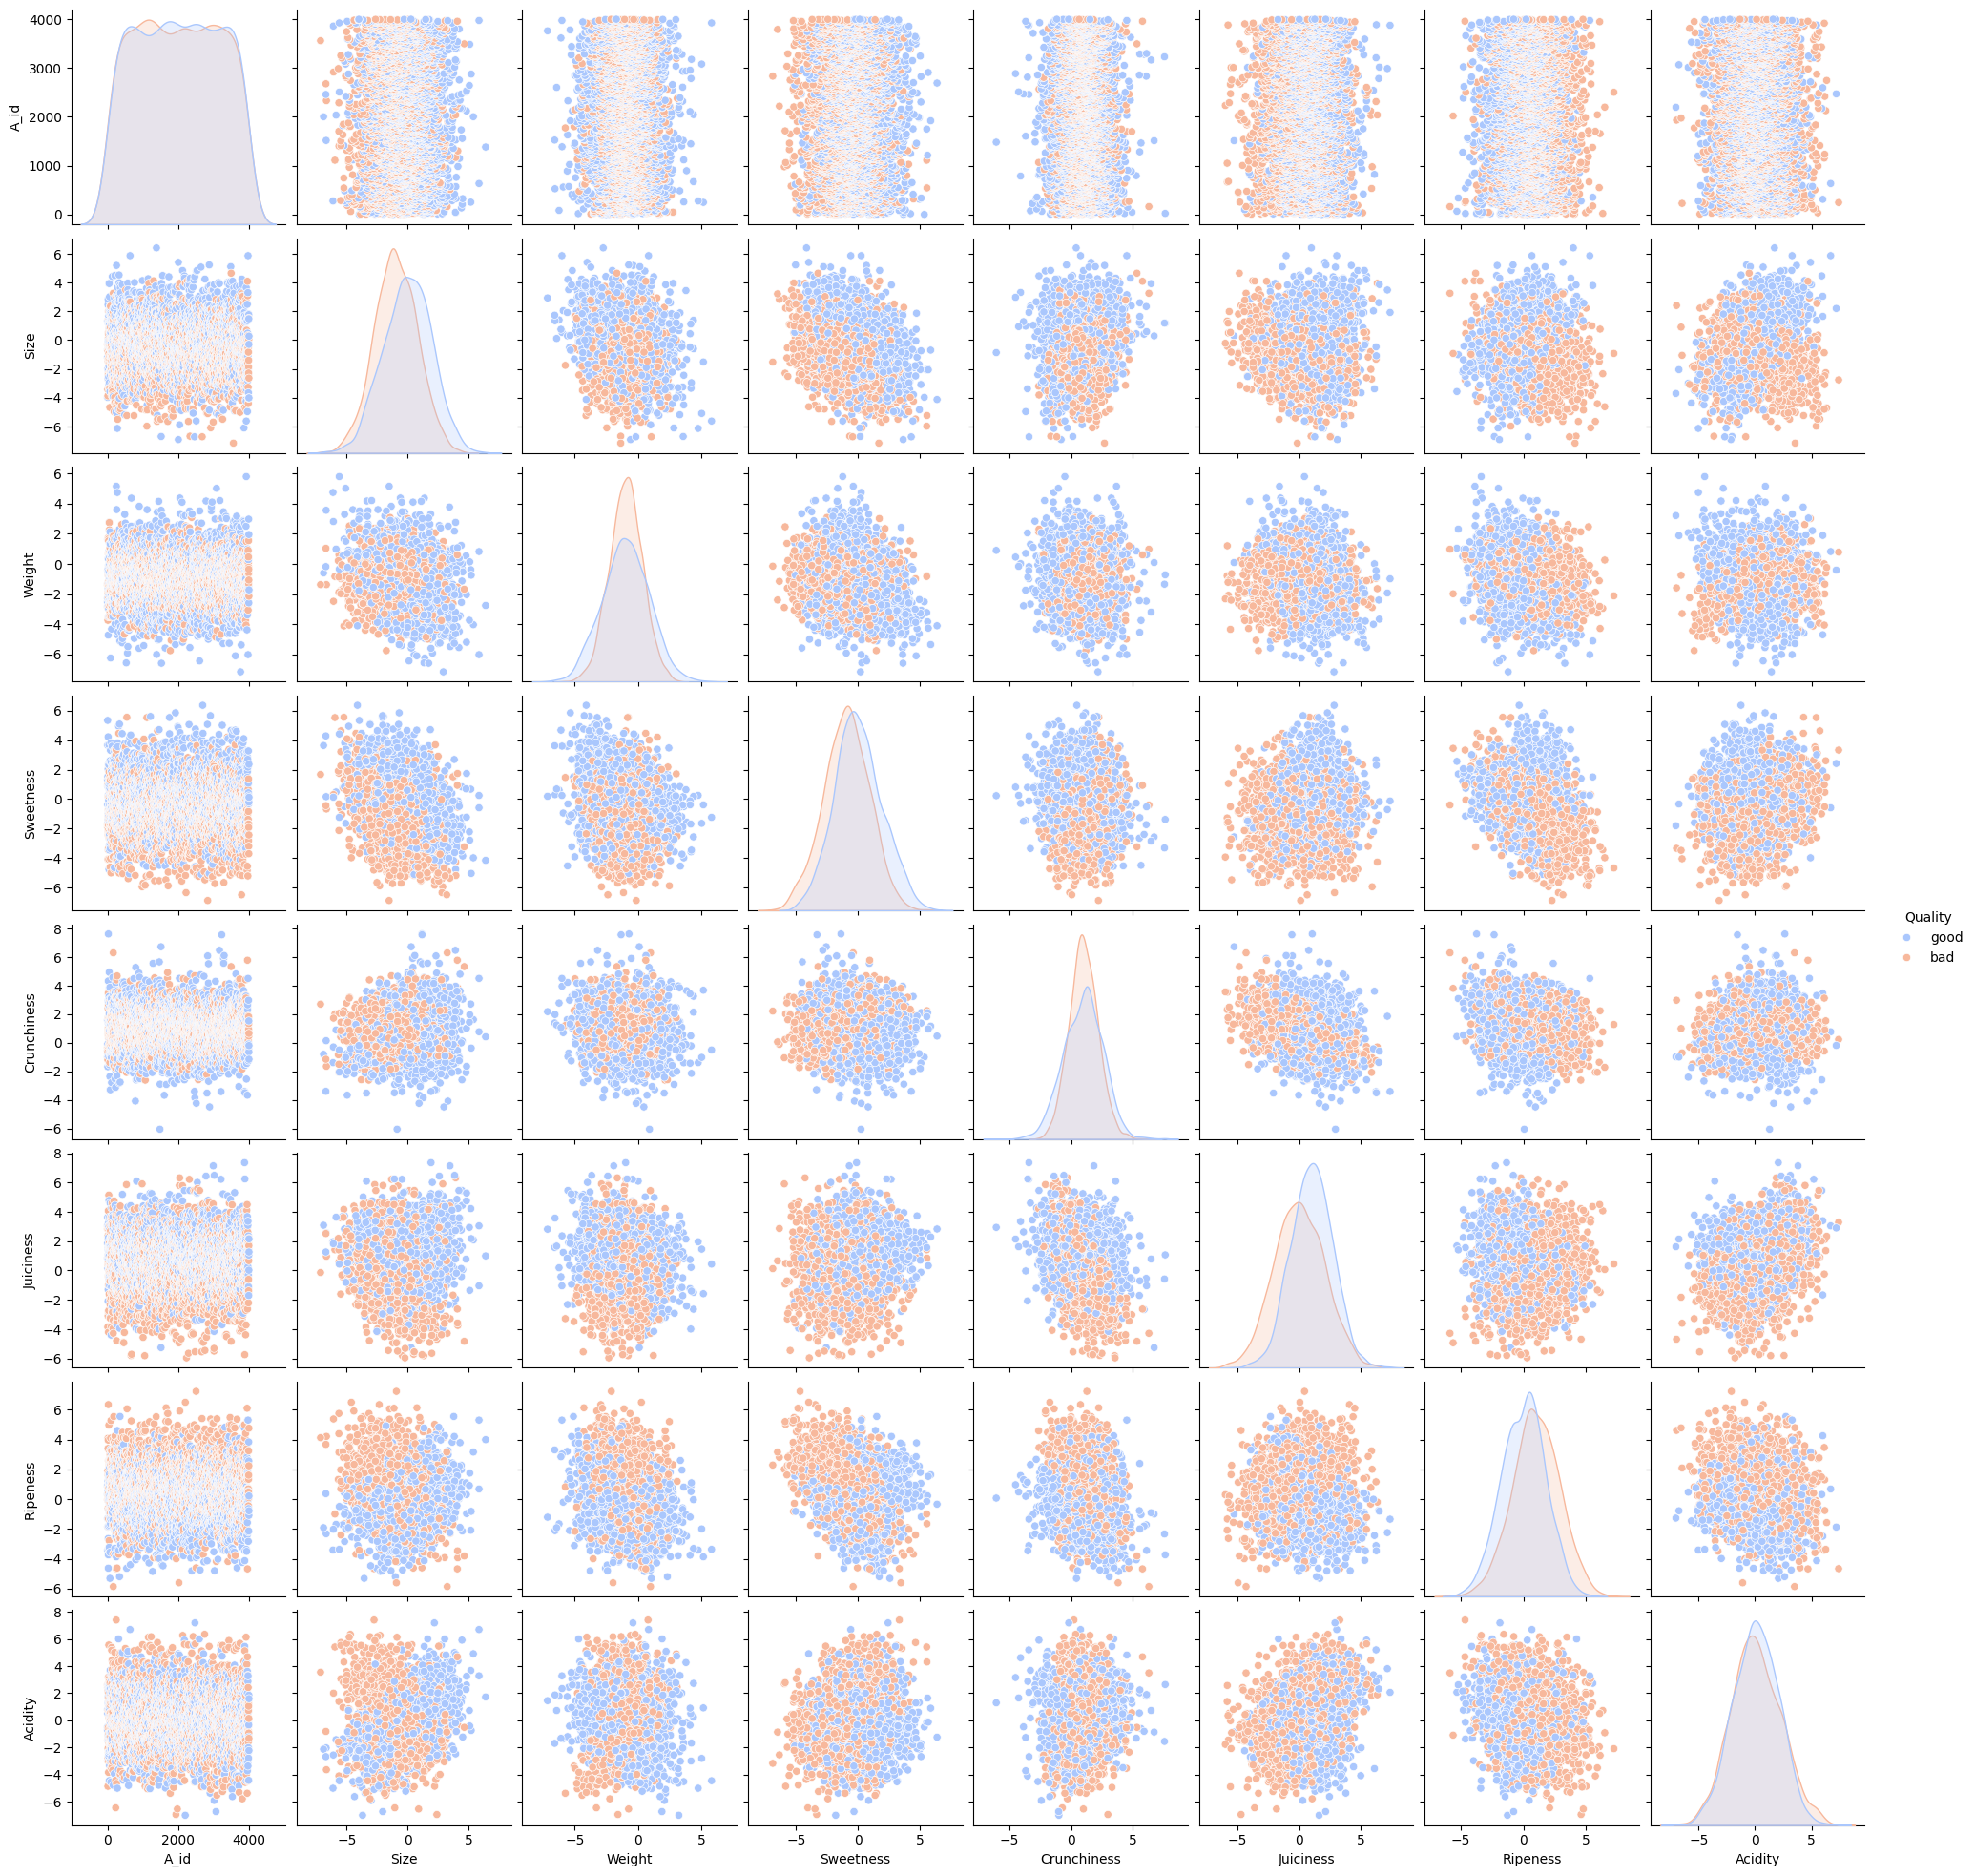

In [ ]:
sns.pairplot(data, hue='Quality', palette='coolwarm')
plt.show()

<ipython-input-15-9b9a54399081>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Quality', y=col, data=data, palette='coolwarm')
<ipython-input-15-9b9a54399081>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Quality', y=col, data=data, palette='coolwarm')
<ipython-input-15-9b9a54399081>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Quality', y=col, data=data, palette='coolwarm')
<ipython-input-15-9b9a54399081>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

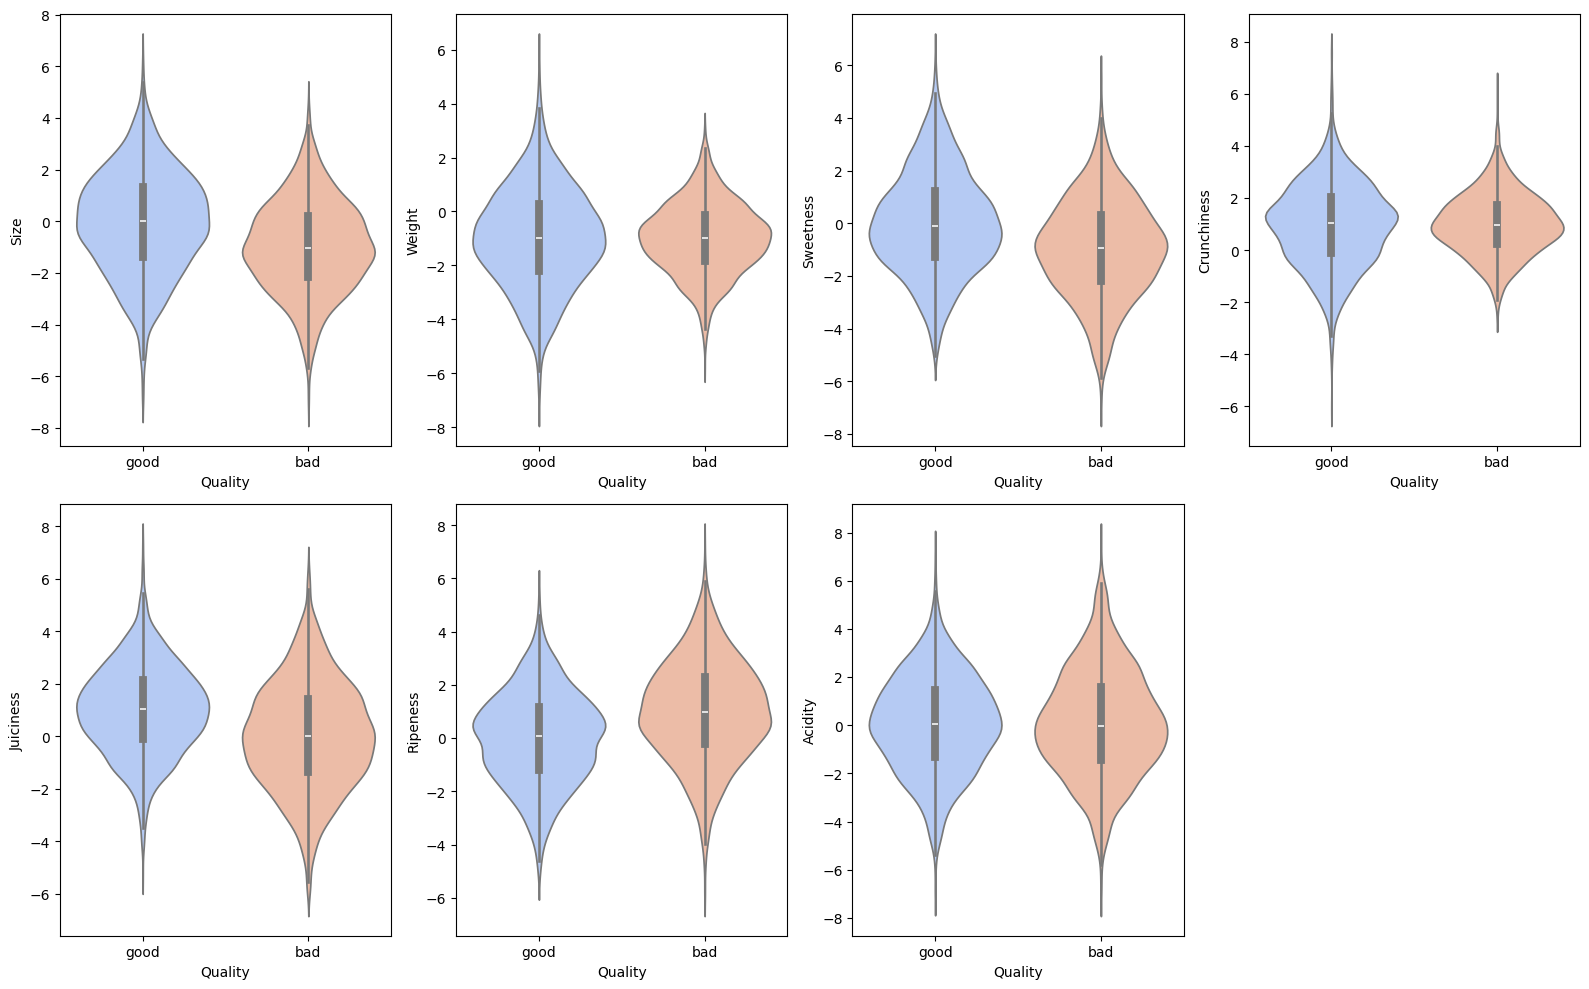

In [ ]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(data.columns[1:-1]):
    plt.subplot(2, 4, i + 1)
    sns.violinplot(x='Quality', y=col, data=data, palette='coolwarm')
plt.tight_layout()
plt.show()

**Using Logistic Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = data['Quality']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression()

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.75375
Classification Report:
              precision    recall  f1-score   support

         bad       0.75      0.76      0.75       401
        good       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

Confusion Matrix:
[[303  98]
 [ 99 300]]


**Using Recommendation System**

In [ ]:
# Assuming 'df' is your DataFrame containing the dataset
X = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = data['Quality']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Compute pairwise cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(X_scaled, X_scaled)

In [ ]:
# Function to get top recommendations for a given fruit index
def get_recommendations(index, top_n=5):
    # Get the similarity scores for the given index
    sim_scores = list(enumerate(cosine_sim[index]))
    # Sort the fruits based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the top N similar fruits (excluding itself)
    top_indices = [i for i, _ in sim_scores[1:top_n+1]]
    # Return the rows of the top N similar fruits
    return data.iloc[top_indices]

In [ ]:
# Example usage: Get top 5 recommendations for the fruit at index 0
index = 0
recommendations = get_recommendations(index)
print(f"Top 5 recommendations for fruit at index {index} are:")
print(recommendations)

Top 5 recommendations for fruit at index 0 are:
      A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
945    945 -3.634500 -1.863588   3.858929    -0.831101   1.474692 -0.038912   
3128  3128 -2.667137 -2.424015   3.665267    -0.208855   1.162849  1.022678   
3931  3931 -2.229395 -1.386031   2.028604     0.189350   1.283513  0.609512   
2494  2494 -2.234137 -1.630200   3.310193    -0.785073   1.086112  0.695695   
3515  3515 -1.944176 -2.241962   3.950713    -0.544151   2.105971  0.286420   

       Acidity Quality  
945  -1.189820    good  
3128  0.091922    good  
3931 -0.836107    good  
2494 -0.981738    good  
3515 -0.961164    good  


**Using K-Means Clustering**

In [ ]:
# Assuming 'df' is your DataFrame containing the dataset
X = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Perform KMeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


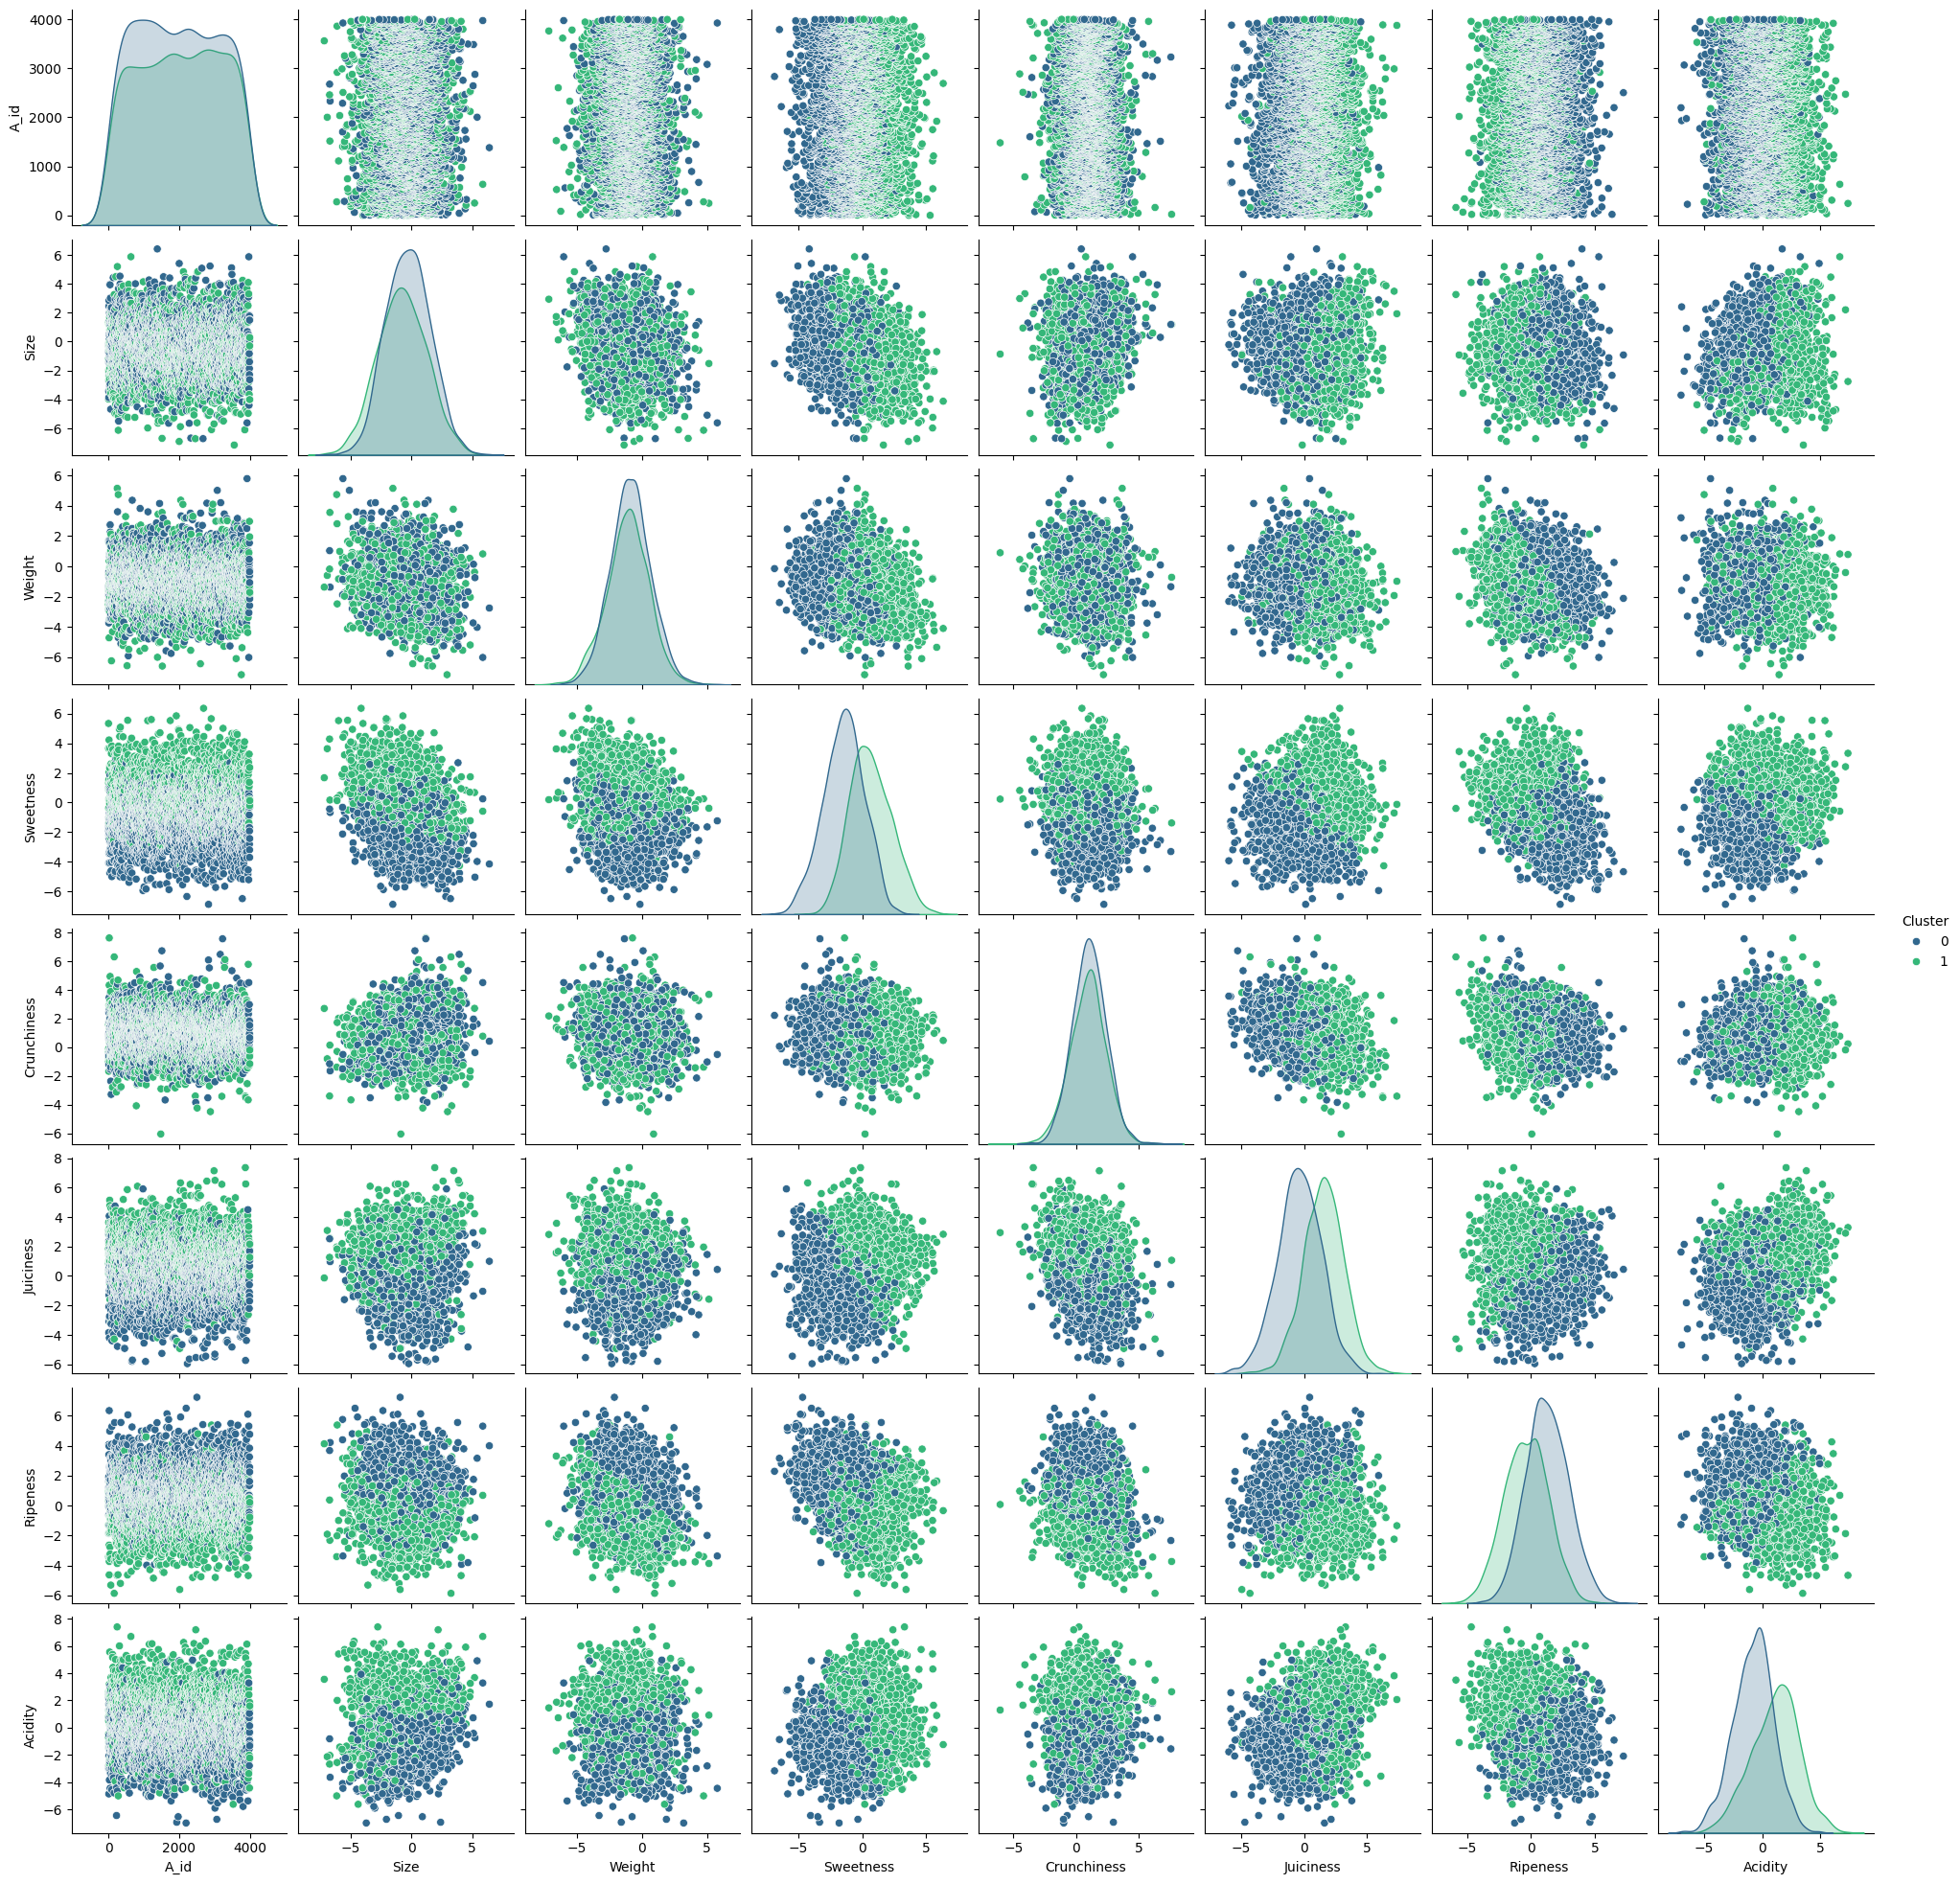

In [ ]:
# Visualize the clusters
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.show()

**Using Feature Importance**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset
X = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = data['Quality']

In [ ]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier()

In [ ]:
# Fit the model
rf.fit(X, y)

RandomForestClassifier()

In [ ]:
# Get feature importances
importances = rf.feature_importances_

In [ ]:
# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance'])

In [ ]:
# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

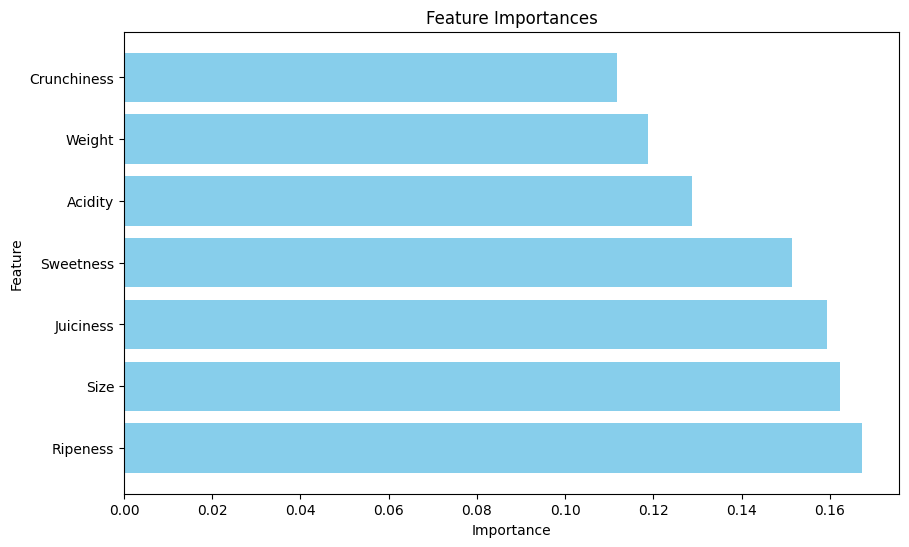

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()